### Problem 4:

(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 128
m = 32

i = np.arange(1, n + 1)[:, None]
j = np.arange(1, m + 1)[None, :]

A = (i / n ) ** (j-1)

b = np.cos(16 * np.pi * i.squeeze() / n) ** 2

(b)

In [2]:
# Solve directly

AtA = A.T @ A
Atb = A.T @ b
x = np.linalg.solve(AtA, Atb)


# Solve with QR factorization

Q, R = np.linalg.qr(A, mode='reduced')
x_qr = np.linalg.solve(R, Q.T @ b)

(c)

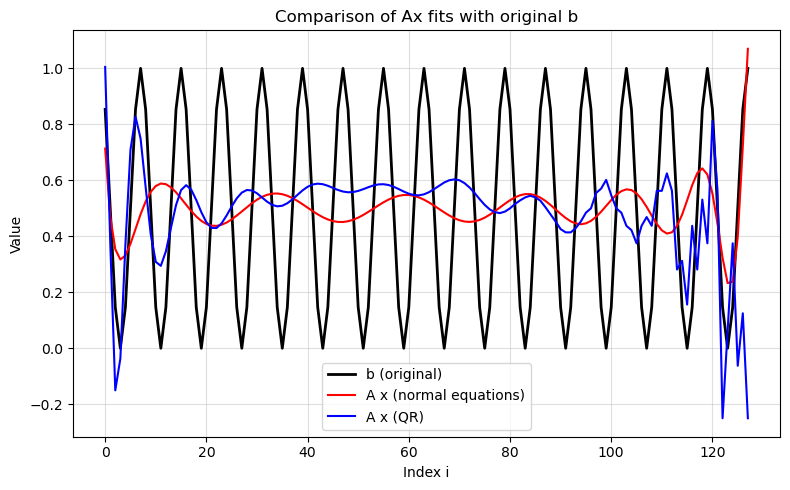

In [3]:
fit_ne = A @ x     # Ax from normal equations
fit_qr = A @ x_qr     # Ax from QR

plt.figure(figsize=(8, 5))
plt.plot(b, 'k', label='b (original)', linewidth=2)
plt.plot(fit_ne, 'r', label='A x (normal equations)', linewidth=1.5)
plt.plot(fit_qr, 'b', label='A x (QR)', linewidth=1.5)

plt.xlabel('Index i')
plt.ylabel('Value')
plt.title('Comparison of Ax fits with original b')
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()